<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo7/Notebooks/Agentes_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Packages:


In [1]:
!pip install langchain-experimental

In [2]:
!pip install langchain-openai
!pip install --force-reinstall -v httpx==0.27.2

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Obtaining dependency information for httpx==0.27.2 from https://files.pythonhosted.org/packages/56/95/9377bcb415797e44274b51d46e3249eba641711cf3348050f76ee7b15ffc/httpx-0.27.2-py3-none-any.whl.metadata
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Obtaining dependency information for anyio from https://files.pythonhosted.org/packages/a0/7a/4daaf3b6c08ad7ceffea4634ec206faeff697526421c20f07628c7372156/anyio-4.7.0-py3-none-any.whl.metadata
  Using cached anyio-4.7.0-py3-none-any.whl.metadata (4.7 kB)
  Obtaining dependency information for certifi from https://files.pythonhosted.org/packages/12/90/3c9ff0512038035f59d279fddeb79f5f1eccd8859f06d6163c58798b9487/certifi-2024.8.30-py3-none-any.whl.metadata
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for httpcore==1.* from https://files.pythonhosted.org/packages/87/f5/72347bc88306acb359581

In [3]:
import pandas as pd
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import OpenAI
from langchain_community.chat_models import ChatOpenAI
import os

##Agentes inteligentes:

**Un agente inteligente es basicamente un modelo de lenguaje que tiene la capacidad de entender el entorno que lo rodea y deacuerdo a este entendimiento comenzar a tomar decisiones (Incluso ejecutar acciones sobre nuestra computadorta)**

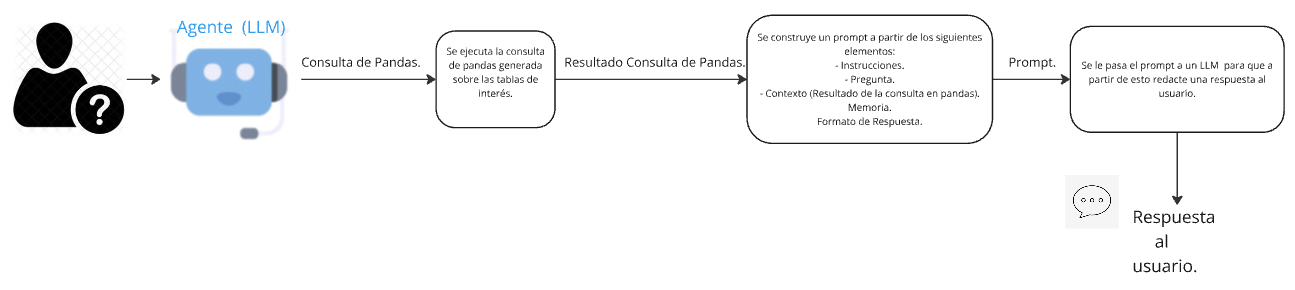

In [4]:
eventos_df=pd.read_parquet("/content/eventos.parquet")
eventos_df

,evento,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_elemento,inicio,fin,duracion_h,tipo_duracion,causa,...,cnt_usus,SAIDI,SAIFI,PHASES,FPARENT,FECHA,LONGITUD,LATITUD,DEP,MUN
0,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 01:01:49,1.030000,> 3 min,Falla en postes y/o crucetas en el SDL,...,1,0.000002,0.000002,3.0,MAZ30L13,2019-01-31,-75.146304,5.263121,CALDAS,MANZANARES
1,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 01:09:36,1.159722,> 3 min,Falla en postes y/o crucetas en el SDL,...,325,0.000757,0.000653,3.0,MAZ30L13,2019-01-31,-75.146304,5.263121,CALDAS,MANZANARES
2,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 01:18:21,1.305556,> 3 min,Falla en postes y/o crucetas en el SDL,...,3015,0.007904,0.006054,3.0,MAZ30L13,2019-01-31,-75.146304,5.263121,CALDAS,MANZANARES
3,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 02:41:00,2.683056,> 3 min,Falla en postes y/o crucetas en el SDL,...,2498,0.013459,0.005016,3.0,MAZ30L13,2019-01-31,-75.146304,5.263121,CALDAS,MANZANARES
4,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 13:22:25,13.373333,> 3 min,Falla en postes y/o crucetas en el SDL,...,3,0.000081,0.000006,3.0,MAZ30L13,2019-01-31,-75.146304,5.263121,CALDAS,MANZANARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168720,8272936,M24083,interruptor,VMA23L15,13.2,2024-06-30 18:17:03,2024-06-30 19:55:11,1.635556,> 3 min,Causa desconocida,...,346,0.001000,0.000611,3.0,VMA23L15,2024-06-30,-75.518162,5.042200,CALDAS,VILLAMARÍA
168721,8272938,M24081,transformador,VMA23L15,TFD,2024-06-30 18:17:40,2024-06-30 20:10:52,1.886667,> 3 min,Causa desconocida,...,146,0.000487,0.000258,1.0,VMA23L15,2024-06-30,-75.518184,5.042223,CALDAS,VILLAMARÍA
168722,8272942,VBO23L14,interruptor,VBO23L14,13.2,2024-06-30 23:11:25,2024-06-30 23:13:14,0.030278,<= 3 min,Condiciones atmosféricas,...,2213,0.000118,0.003909,3.0,VBO23L14,2024-06-30,-75.848670,5.065073,CALDAS,SAN JOSÉ
168723,8272942,VBO23L14,interruptor,VBO23L14,13.2,2024-06-30 23:11:25,2024-06-30 23:13:33,0.035556,<= 3 min,Condiciones atmosféricas,...,258,0.000016,0.000456,3.0,VBO23L14,2024-06-30,-75.848670,5.065073,CALDAS,SAN JOSÉ


In [11]:
from getpass import getpass #Para ingresar la API KEY de OPEN AI
import os #Para cargar la API en las variables de entorno de la máquina

OPENAI_API_KEY = getpass('Enter the secret value: ')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

Enter the secret value: ··········


##Contextualizando al Agente Inteligente A partir de Ejemplos de la Data:

In [12]:
agent = create_pandas_dataframe_agent(
        ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
        eventos_df,
        verbose=True,
        agent_type="openai-functions",#prefix=descripcion_df,  # Añade la descripción al inicio del prompt #suffix=suffix_instrucciones.format(path_plot=path_plot),
        allow_dangerous_code=True,
        include_df_in_prompt=True,  # Incluye las primeras filas del DataFrame en el prompt
        number_of_head_rows=5)

query="Cuantas interrupciones han habido en cada año. Respondeme siempre en español."
response=agent.invoke(query)["output"]



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['inicio'] = pd.to_datetime(df['inicio'])\ninterrupciones_por_ano = df['inicio'].dt.year.value_counts()\ninterrupciones_por_ano"}`


NameError: name 'pd' is not defined
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\ndf['inicio'] = pd.to_datetime(df['inicio'])\ninterrupciones_por_ano = df['inicio'].dt.year.value_counts()\ninterrupciones_por_ano"}`
responded: Se me olvidó importar la librería pandas. Déjame corregirlo.

inicio
2023    46216
2022    29491
2021    28453
2019    25190
2024    20684
2020    18691
Name: count, dtype: int64El número de interrupciones por año es el siguiente:
- En 2023 hubo 46,216 interrupciones.
- En 2022 hubo 29,491 interrupciones.
- En 2021 hubo 28,453 interrupciones.
- En 2019 hubo 25,190 interrupciones.
- En 2024 hubo 20,684 interrupciones.
- En 2020 hubo 18,691 interrupciones.

> Finished chain.


In [ ]:
response

'En cada año, el número de interrupciones ha sido el siguiente:\n- 2019: 25,190 interrupciones\n- 2020: 18,691 interrupciones\n- 2021: 28,453 interrupciones\n- 2022: 29,491 interrupciones\n- 2023: 46,216 interrupciones\n- 2024: 20,684 interrupciones'

#Contextualizando al Agente Inteligente apartir de la Descripción de la Data:

In [ ]:
head_df = eventos_df.head(5).to_string(index=False)

descripcion_df="""
Este DataFrame contiene información acerca de interrupciones o eventos presentadas en redes eléctricas de media tensión,
más específicamente en tres tipos de equipos: Tranformadores, interruptores y tramos de linea (tramos de red).

Las columnas incluyen:
- **Evento**: Id de la interrupción o el evento.
- **equipo_ope**: Código del equipo en el que ocurrió la interrupción.
- **tipo_equi_ope**: Me indica si la interrupción ocurrió sobre un Transformador, o sobre un interruptor o sobre un tramo de linea, es decir que tiene solo tres posibles valores.
- **cto_equi_ope**: Código del circuito al que pertenece el equipo en el cual se dió la interrupción.
- **tipo_elemento**: Capacidad en Kilo Voltios del equipo en el cual ocurrió la interrupción, tiene 4 posibles valores: 33, 13.2, TFD y TFP
- **inicio**: Fecha y hora del inicio del evento o interrupción.
- **fin**: Fecha y hora de la finalización del evento o interrupción.
- **duracion_h**: Duración en horas del evento o interrupción.
- **tipo_duracion**: Variable categórica que indica si ele vento duró más de tres minutos o no; por tanto, tiene dos posibles valores: > 3 min y <= 3 min
- **causa**: Causa del evento o interrupción.
- **CNT_TRAFOS_AFEC**: Cantidad de transformadores afectados en la interrupción o evento.
- **cnt_usus**: Cantidad de usuarios afectados por la interrupción o evento.
- **SAIDI**: Indicador que mide el promedio de la duración en horas de la interrupción por usuario.
- **SAIFI**: Indicador que mide el promedio de cantidad de interrupciones por usuario.
- **PHASES**: Número de fases del equipo en el que ocurrió la interrupción; por tanto tiene 3 posibles valores: 3., 1., 2.
- **FPARENT**: Código del circuito que contiene el equipo en donde se presentó la interrupción.
- **FECHA**: Fecha en la que se presentó el evento o interrupción.
- **LONGITUD**: Longitud geográfica de la ubicación del equipo en el que se presentó la interrupción o evento.
- **LATITUD**: Latiud geográfica de la ubicación del equipo en el que se presentó la interrupción o evento.
- **DEP**: Departamento en donde se presentó la interrupción o evento.
- **MUN**: Municipio en donde se presentó la interrupción o evento.
"""

agent = create_pandas_dataframe_agent(
        ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
        eventos_df,
        verbose=True,
        agent_type="openai-functions",
        prefix=descripcion_df,  # Añade la descripción al inicio del prompt #suffix=suffix_instrucciones.format(path_plot=path_plot),
        allow_dangerous_code=True)

query="Cuantas interrupciones han habido en cada año. Respondeme siempre en español."
response=agent.invoke(query)["output"]



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['anio'].value_counts()"}`


anio
2023    46216
2022    29491
2021    28453
2019    25190
2024    20684
2020    18691
Name: count, dtype: int64En cada año se han presentado las siguientes cantidades de interrupciones:
- En 2019: 25,190 interrupciones.
- En 2020: 18,691 interrupciones.
- En 2021: 28,453 interrupciones.
- En 2022: 29,491 interrupciones.
- En 2023: 46,216 interrupciones.
- En 2024: 20,684 interrupciones.

> Finished chain.


In [ ]:
response

'En cada año se han presentado las siguientes cantidades de interrupciones:\n- En 2019: 25,190 interrupciones.\n- En 2020: 18,691 interrupciones.\n- En 2021: 28,453 interrupciones.\n- En 2022: 29,491 interrupciones.\n- En 2023: 46,216 interrupciones.\n- En 2024: 20,684 interrupciones.'

#Generando Gráficos apartir del Agente Inteligente:



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# Agrupar los datos por departamento y año y contar las interrupciones\ninterrupciones_por_departamento_anio = df.groupby(['DEP', 'anio']).size().unstack()\n\n# Crear el gráfico\nfig, ax = plt.subplots(figsize=(12, 8))\n\n# Colores personalizados\ncolors = ['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#9E9E9E']\n\n# Graficar los datos\ninterrupciones_por_departamento_anio.plot(kind='bar', stacked=True, color=colors, ax=ax)\n\n# Títulos y etiquetas en español\nax.set_title('Cantidad de Interrupciones por Departamento y Año')\nax.set_xlabel('Año')\nax.set_ylabel('Cantidad de Interrupciones')\n\n# Guardar la imagen\nplt.tight_layout()\nplt.savefig('/content/image.jpg')"}`




<string>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


El gráfico ha sido creado y guardado en la ruta relativa `/content/image.jpg`.

> Finished chain.


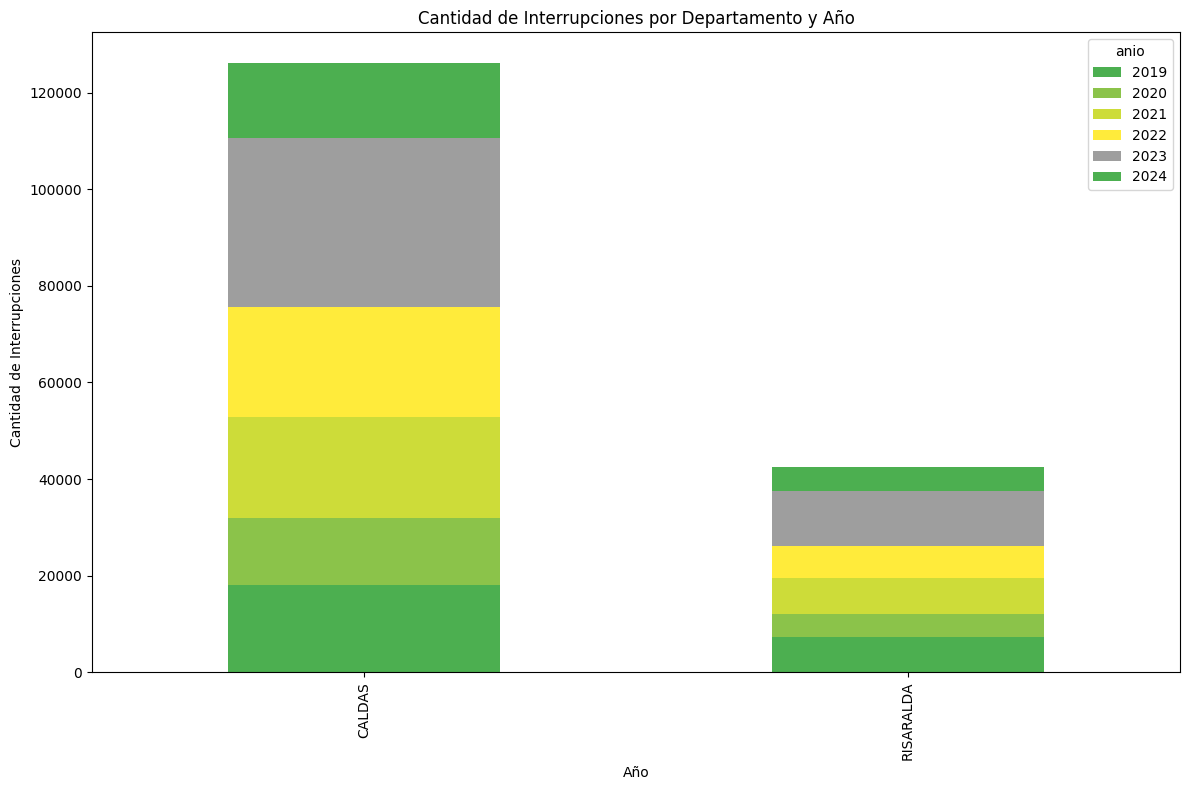

In [ ]:
query="Construye un gráfico en el cual me muestres la cantidad de interrupciones por cada departamento por cada año"
path_plot="/content/image.jpg"
prompt=f"""{query}. Construye el gráfico de la forma más estética posible para mostrar a un usuario.
    Puedes utilizar los siguientes colores: verde y gris en diferentes tonalidades (si es necesario, utiliza más colores).
    Además, los títulos y ejes de los gráficos deben estar en español.
    Guarda la imagen en la ruta relativa {path_plot}.
    No ejecutes el comando plt.show().
    Siempre ejecuta el comando plt.tight_layout()."""

agent = create_pandas_dataframe_agent(
        ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
        eventos_df,
        verbose=True,
        agent_type="openai-functions",#prefix=descripcion_df,  # Añade la descripción al inicio del prompt #suffix=suffix_instrucciones.format(path_plot=path_plot),
        allow_dangerous_code=True,
        include_df_in_prompt=True,  # Incluye las primeras filas del DataFrame en el prompt
        number_of_head_rows=5)

response=agent.invoke(prompt)["output"]

In [ ]:
response

'El gráfico ha sido creado y guardado en la ruta relativa `/content/image.jpg`.'